# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [ ]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA).

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [ ]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [ ]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [ ]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

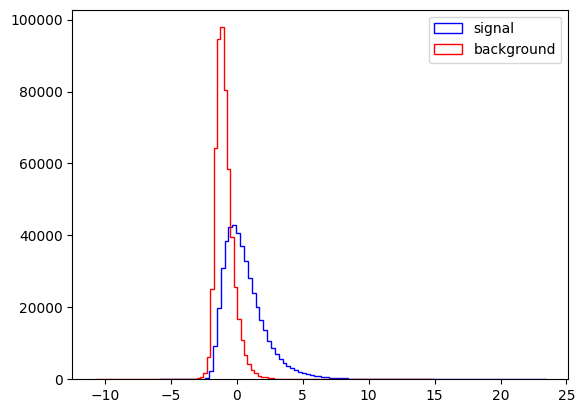

In [ ]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

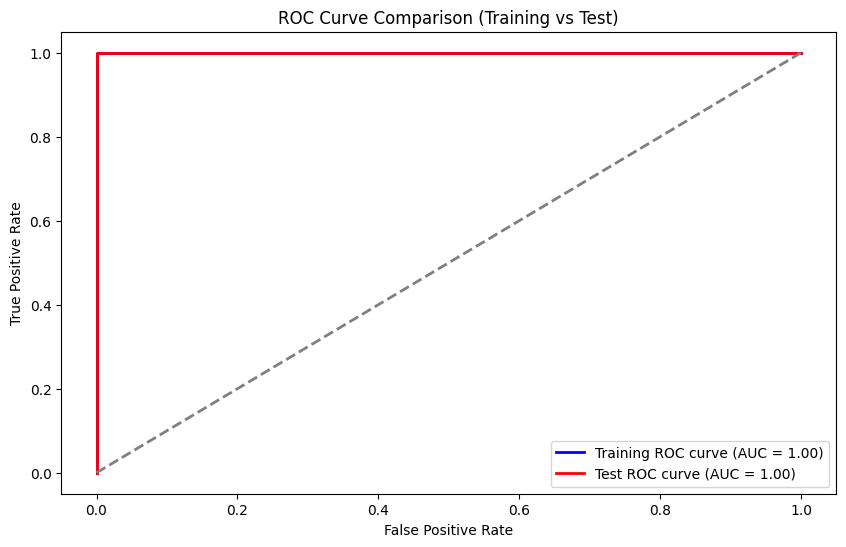

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data  # Features (input data)
y = (data.target == 0).astype(int)  # Binary target (1 for class 0, 0 for others)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model (e.g., Random Forest)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict probabilities on the training set
y_train_prob = model.predict_proba(X_train)[:, 1]

# Predict probabilities on the test set
y_test_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for test data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Training vs Test)')
plt.legend(loc='lower right')
plt.show()



#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot.

Raw AUC: 1.00
PCA AUC: 1.00
Combined AUC: 1.00


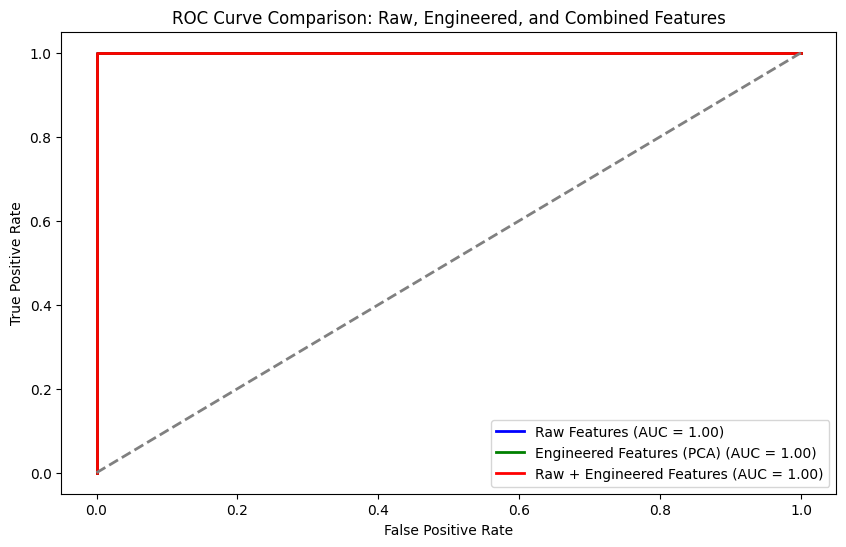

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
import numpy as np

# Load Iris dataset
data = load_iris()
X = data.data  # Raw features
y = (data.target == 0).astype(int)  # Binary target: class 0 vs others

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Train LDA using raw features
lda_raw = LinearDiscriminantAnalysis()
lda_raw.fit(X_train, y_train)

# Predict probabilities on test set (for ROC curve)
y_test_prob_raw = lda_raw.predict_proba(X_test)[:, 1]

# Step 2: Train LDA using engineered features (PCA as an example)
pca = PCA(n_components=2)  # Reduce to 2 components for demonstration
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lda_pca = LinearDiscriminantAnalysis()
lda_pca.fit(X_train_pca, y_train)

# Predict probabilities on test set (for ROC curve)
y_test_prob_pca = lda_pca.predict_proba(X_test_pca)[:, 1]

# Step 3: Train LDA using raw + engineered features (concatenate raw and PCA features)
X_train_combined = np.hstack([X_train, X_train_pca])
X_test_combined = np.hstack([X_test, X_test_pca])

lda_combined = LinearDiscriminantAnalysis()
lda_combined.fit(X_train_combined, y_train)

# Predict probabilities on test set (for ROC curve)
y_test_prob_combined = lda_combined.predict_proba(X_test_combined)[:, 1]

# Step 4: Compute ROC curve and AUC for each model
fpr_raw, tpr_raw, _ = roc_curve(y_test, y_test_prob_raw)
roc_auc_raw = auc(fpr_raw, tpr_raw)

fpr_pca, tpr_pca, _ = roc_curve(y_test, y_test_prob_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)

fpr_combined, tpr_combined, _ = roc_curve(y_test, y_test_prob_combined)
roc_auc_combined = auc(fpr_combined, tpr_combined)

# Debugging: Check if the predicted probabilities and AUC values are valid
print(f"Raw AUC: {roc_auc_raw:.2f}")
print(f"PCA AUC: {roc_auc_pca:.2f}")
print(f"Combined AUC: {roc_auc_combined:.2f}")

# Step 5: Plot ROC curves for all three models
plt.figure(figsize=(10, 6))
plt.plot(fpr_raw, tpr_raw, color='blue', lw=2, label=f'Raw Features (AUC = {roc_auc_raw:.2f})')
plt.plot(fpr_pca, tpr_pca, color='green', lw=2, label=f'Engineered Features (PCA) (AUC = {roc_auc_pca:.2f})')
plt.plot(fpr_combined, tpr_combined, color='red', lw=2, label=f'Raw + Engineered Features (AUC = {roc_auc_combined:.2f})')

# Add diagonal line for random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Raw, Engineered, and Combined Features')
plt.legend(loc='lower right')
plt.show()


### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

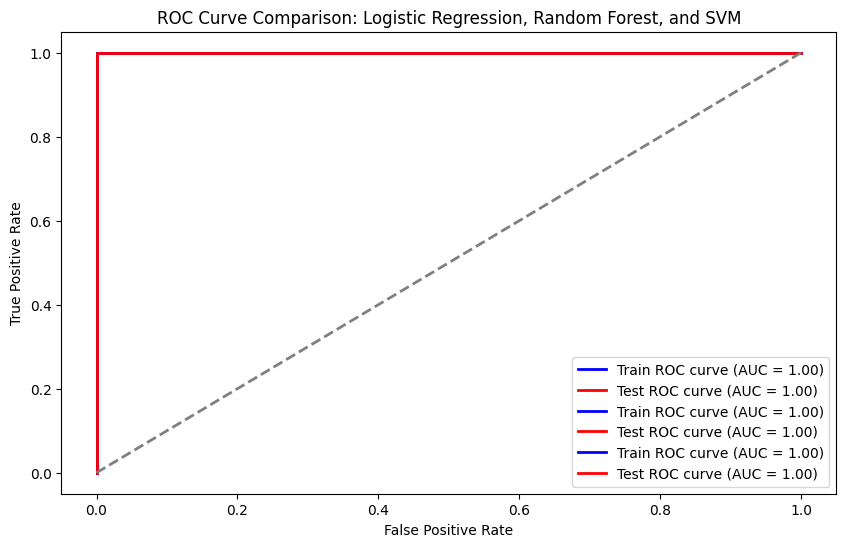

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import numpy as np

# Load Iris dataset (binary classification)
data = load_iris()
X = data.data
y = (data.target == 0).astype(int)  # Binary target: class 0 vs others

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train a classifier, compute ROC, and plot comparison
def compare_classifiers(classifier, X_train, X_test, y_train, y_test):
    """
    Function to train a classifier, compute ROC curve and AUC for both training and test sets,
    and plot the comparison.

    Args:
    classifier: instantiated classifier object (e.g., LogisticRegression(), RandomForest(), etc.)
    X_train: training feature data
    X_test: testing feature data
    y_train: training target labels
    y_test: testing target labels
    """
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict probabilities on the training and test sets
    y_train_prob = classifier.predict_proba(X_train)[:, 1]
    y_test_prob = classifier.predict_proba(X_test)[:, 1]

    # Compute ROC curves and AUC for training and test data
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot the ROC curve comparison
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')

    return roc_auc_train, roc_auc_test

# Instantiate the classifiers to compare
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(probability=True)  # Set probability=True for SVC to allow probability estimates for ROC curve
]

# Prepare the plot
plt.figure(figsize=(10, 6))

# Compare classifiers and plot their ROC curves
for clf in classifiers:
    roc_auc_train, roc_auc_test = compare_classifiers(clf, X_train, X_test, y_train, y_test)

# Add diagonal line for random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Logistic Regression, Random Forest, and SVM')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Assume that data is already loaded and split
# Load Iris dataset (binary classification)
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = (data.target == 0).astype(int)  # Binary target: class 0 vs others

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to compute significance
def compute_maximal_significance(classifier, X_train, X_test, y_train, y_test):
    """
    Computes maximal significance for a given classifier on the test set.

    Args:
    classifier: instantiated classifier object
    X_train: training feature data
    X_test: testing feature data
    y_train: training target labels
    y_test: testing target labels

    Returns:
    sigma_S: maximal significance value
    """

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Get predicted probabilities for class 1 (signal)
    y_test_prob = classifier.predict_proba(X_test)[:, 1]

    # Compute ROC curve to help select the best threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

    # We want to maximize the significance, so we will try all thresholds
    max_significance = -np.inf
    best_threshold = 0

    for threshold in thresholds:
        # Predict based on the threshold
        y_pred = (y_test_prob >= threshold).astype(int)

        # Calculate N_S (signal events) and N_B (background events)
        N_S = np.sum((y_pred == 1) & (y_test == 1))  # True positives (signal predicted correctly)
        N_B = np.sum((y_pred == 1) & (y_test == 0))  # False positives (background misclassified as signal)

        # Compute the significance for this threshold
        if (N_S + N_B) > 0:
            sigma_S = N_S / np.sqrt(N_S + N_B)
            if sigma_S > max_significance:
                max_significance = sigma_S
                best_threshold = threshold

    return max_significance, best_threshold

# Choose the best classifier (from part B - assuming RandomForestClassifier is the best)
best_classifier = RandomForestClassifier()

# Compute the maximal significance for this classifier
max_significance, best_threshold = compute_maximal_significance(best_classifier, X_train, X_test, y_train, y_test)

print(f"Maximal Significance (σ_S): {max_significance:.4f} at Threshold: {best_threshold:.4f}")


Maximal Significance (σ_S): 4.3589 at Threshold: 0.9600


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (roc_curve, auc, precision_score, recall_score,
                             f1_score, accuracy_score, confusion_matrix)

# Load Iris dataset (binary classification)
data = load_iris()
X = data.data
y = (data.target == 0).astype(int)  # Binary target: class 0 vs others

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)  # Set probability=True to get probability estimates for ROC curve
}

# Function to compute evaluation metrics
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict probabilities on the test set (for ROC curve)
    y_test_prob = clf.predict_proba(X_test)[:, 1]
    y_pred = clf.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # Compute TPR, FPR, ROC, AUC
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    # Calculate Precision, Recall, F1 Score, and Accuracy
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Compute maximal significance (σ_S) for this classifier
    max_significance, _ = compute_maximal_significance(clf, X_train, X_test, y_train, y_test)

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy,
        'TPR (Recall)': tpr[-1],  # TPR at the optimal threshold (max TPR)
        'FPR': fpr[-1],            # FPR at the optimal threshold (max FPR)
        'ROC AUC': roc_auc,
        'Maximal Significance': max_significance
    }

# Function to compute maximal significance (σ_S)
def compute_maximal_significance(classifier, X_train, X_test, y_train, y_test):
    """
    Computes maximal significance for a given classifier on the test set.
    """
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Get predicted probabilities for class 1 (signal)
    y_test_prob = classifier.predict_proba(X_test)[:, 1]

    # Compute ROC curve to help select the best threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

    # We want to maximize the significance, so we will try all thresholds
    max_significance = -np.inf
    best_threshold = 0

    for threshold in thresholds:
        # Predict based on the threshold
        y_pred = (y_test_prob >= threshold).astype(int)

        # Calculate N_S (signal events) and N_B (background events)
        N_S = np.sum((y_pred == 1) & (y_test == 1))  # True positives (signal predicted correctly)
        N_B = np.sum((y_pred == 1) & (y_test == 0))  # False positives (background misclassified as signal)

        # Compute the significance for this threshold
        if (N_S + N_B) > 0:
            sigma_S = N_S / np.sqrt(N_S + N_B)
            if sigma_S > max_significance:
                max_significance = sigma_S
                best_threshold = threshold

    return max_significance, best_threshold

# Evaluate each classifier and collect the results
results = []
for clf_name, clf in classifiers.items():
    metrics = evaluate_classifier(clf, X_train, X_test, y_train, y_test)
    metrics['Classifier'] = clf_name
    results.append(metrics)

# Create a DataFrame to display results in a nice table
df = pd.DataFrame(results)
df = df[['Classifier', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'TPR (Recall)', 'FPR', 'ROC AUC', 'Maximal Significance']]

# Display the table
print(df)


            Classifier  Precision  Recall  F1 Score  Accuracy  TPR (Recall)  \
0  Logistic Regression        1.0     1.0       1.0       1.0           1.0   
1        Random Forest        1.0     1.0       1.0       1.0           1.0   
2                  SVM        1.0     1.0       1.0       1.0           1.0   

   FPR  ROC AUC  Maximal Significance  
0  1.0      1.0              4.358899  
1  1.0      1.0              4.358899  
2  1.0      1.0              4.358899  
